In [2]:
# importing the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [7]:
clothing_fashion_mnist = tf.keras.datasets.fashion_mnist
 
# loading the dataset from tensorflow
(x_train, y_train), (x_test, y_test) = clothing_fashion_mnist.load_data()
 
# displaying the shapes of training and testing dataset
print(x_train)
print('Shape of training cloth images: ',
      x_train.shape)
 
print('Shape of training label: ',
      y_train.shape)
 
print('Shape of test cloth images: ',
      x_test.shape)
 
print('Shape of test labels: ',
      y_test.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Shape of training cloth images:  (60000, 28, 28)
Shape of training label:  (60000,)
Shape of test cloth images:  (10000, 28, 28)
Shape of test labels:  (10000,)


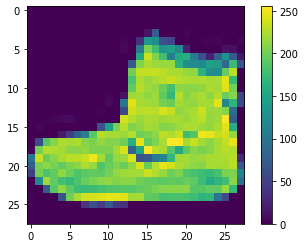

In [34]:

# storing the class names as it is
# not provided in the dataset
label_class_names = ['T-shirt/top', 'Trouser',
                     'Pullover', 'Dress', 'Coat',
                     'Sandal', 'Shirt', 'Sneaker',
                     'Bag', 'Ankle boot']
 
# display the first 9images
plt.imshow(x_train[0]) 
plt.colorbar()  # to display the colourbar
plt.show()

In [6]:
x_train = x_train / 255.0 # normalizing the training data
x_test = x_test / 255.0 # normalizing the testing data


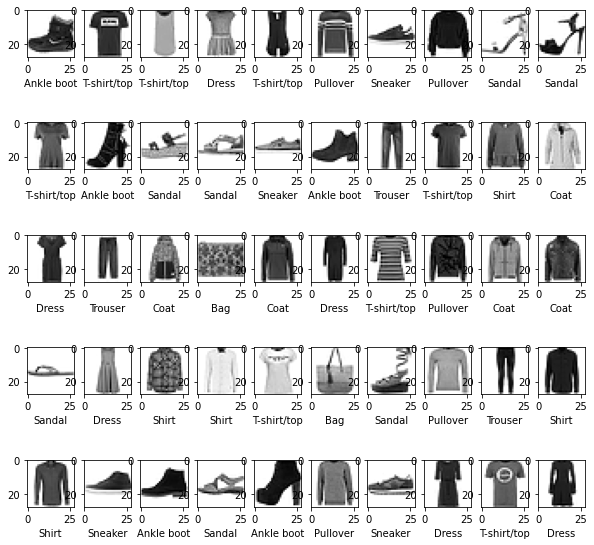

In [20]:
plt.figure(figsize=(10, 10)) # figure size
i = 0
while i < 50:
	plt.subplot(5, 10, i+1)
	
	# showing each image with colourmap as binary
	plt.imshow(x_train[i], cmap=plt.cm.binary)
	
	# giving class labels
	plt.xlabel(label_class_names[y_train[i]])
	i = i+1
	
plt.show() # plotting the final output figure


In [24]:
# Building the model
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28, 28)),
	tf.keras.layers.Dense(128, activation='relu'),
	tf.keras.layers.Dense(10)
])


In [25]:

# compiling the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

# Fitting the model to the training data
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 3.0657 - accuracy: 0.7055
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6782 - accuracy: 0.7635
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5859 - accuracy: 0.7911
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5380 - accuracy: 0.8114
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5070 - accuracy: 0.8228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4973 - accuracy: 0.8271
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4890 - accuracy: 0.8313
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4771 - accuracy: 0.8363
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4709 - accuracy: 0.8389
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.468

In [26]:

# calculating loss and accuracy score
test_loss, test_acc = model.evaluate(x_test,
                                           y_test,
                                           verbose=2)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5729 - accuracy: 0.8038 - 702ms/epoch - 2ms/step

Test loss: 0.5728746056556702

Test accuracy: 0.8037999868392944


In [27]:
# using Softmax() function to convert
# linear output logits to probability
prediction_model = tf.keras.Sequential(
	[model, tf.keras.layers.Softmax()])

# feeding the testing data to the probability
# prediction model
prediction = prediction_model.predict(x_test)

# predicted class label
print('Predicted test label:', np.argmax(prediction[0]))

# predicted class label name
print(label_class_names[np.argmax(prediction[0])])

# actual class label
print('Actual test label:', y_test[0])


313/313 [==============================] - 1s 2ms/step
Predicted test label: 9
Ankle boot
Actual test label: 9


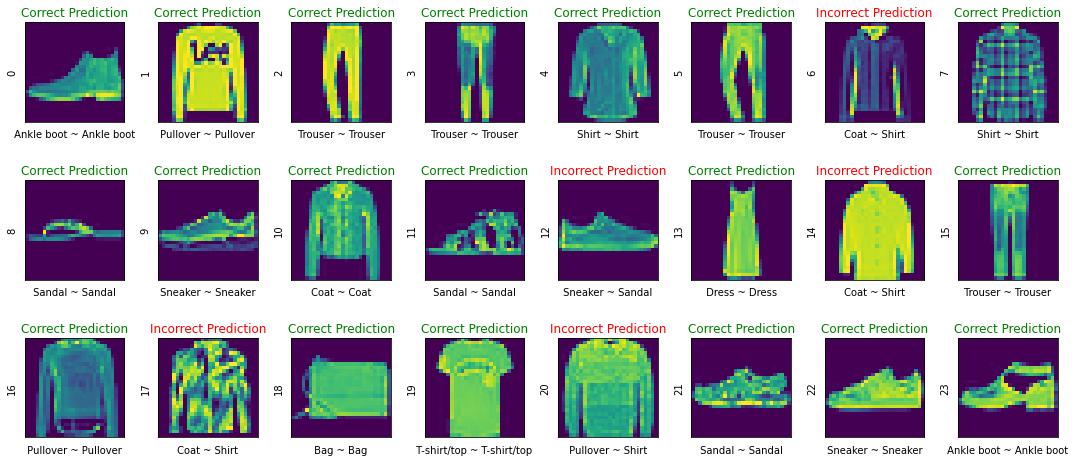

In [36]:
# assigning the figure size
plt.figure(figsize=(15, 7))
i = 0

# plotting total 24 images by iterating through it
while i < 24:
	image, actual_label = x_test[i], y_test[i]
	predicted_label = np.argmax(prediction[i])
	plt.subplot(3, 8, i+1)
	plt.tight_layout()
	plt.xticks([])
	plt.yticks([])
	
	# display plot
	plt.imshow(image)
	
	# if else condition to distinguish right and
	# wrong
	color, label = ('green', 'Correct Prediction') if predicted_label == actual_label else (
        'red', 'Incorrect Prediction')
	
	# plotting labels and giving color to it
	# according to its correctness
	plt.title(label, color=color)
	
	# labelling the images in x-axis to see
	# the correct and incorrect results
	plt.xlabel(" {} ~ {} ".format(
		label_class_names[actual_label],
	label_class_names[predicted_label]))
	
	# labelling the images orderwise in y-axis
	plt.ylabel(i)
	
	# incrementing counter variable
	i += 1
